Chọn ảnh núi và thuyền .
Xoay cả hai đối tượng 45 độ, giữ kích thước ban đầu (reshape=False).
Tạo hiệu ứng phản chiếu dọc (vertical mirror) cho cả hai đối tượng sau khi xoay.
Ghép cả hai đối tượng lên một canvas trắng và lưu vào mountain_boat_mirror.jpg

✅ Đã lưu ảnh tại: mountain_boat_mirror.jpg


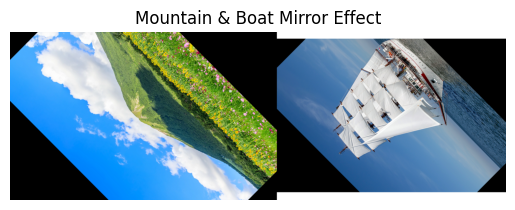

In [5]:
# 1. Thư viện
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import os

# 2. Đọc ảnh
img_mountain = Image.open("exercise/mountain.jpg").convert("RGBA")
img_boat = Image.open("exercise/boat.jpg").convert("RGBA")

# 3. Xoay ảnh 45 độ (reshape=False giữ nguyên kích thước ảnh)
def rotate_image(img, angle):
    return img.rotate(angle, resample=Image.BICUBIC, expand=False)

rotated_mountain = rotate_image(img_mountain, 45)
rotated_boat = rotate_image(img_boat, 45)

# 4. Phản chiếu dọc (vertical mirror)
mirrored_mountain = ImageOps.flip(rotated_mountain)
mirrored_boat = ImageOps.flip(rotated_boat)

# 5. Tạo canvas trắng (RGB)
canvas_width = rotated_mountain.width + rotated_boat.width
canvas_height = max(rotated_mountain.height, rotated_boat.height)
canvas = Image.new("RGB", (canvas_width, canvas_height), (255, 255, 255))

# 6. Ghép ảnh lên canvas
canvas.paste(mirrored_mountain.convert("RGB"), (0, (canvas_height - mirrored_mountain.height) // 2))
canvas.paste(mirrored_boat.convert("RGB"), (rotated_mountain.width, (canvas_height - mirrored_boat.height) // 2))

# 7. Lưu ảnh
output_path = "mountain_boat_mirror.jpg"
canvas.save(output_path, format="JPEG")
print(f"✅ Đã lưu ảnh tại: {output_path}")

# 8. Hiển thị ảnh kết quả
plt.imshow(canvas)
plt.axis('off')
plt.title("Mountain & Boat Mirror Effect")
plt.show()
